In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/feats_reduced_byRF.csv')

In [3]:
columns = df.columns
feat_cols = []
for name in columns:
    if name != "structureProteinName" and name != "cellID" and name != "save_feats_path":
        feat_cols.append(name)

In [4]:
X = df[feat_cols]
y = df.structureProteinName

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [6]:
rf = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=0)

In [7]:
#rf.fit(X_train, y_train)

In [8]:
#joblib.dump(rf, 'models/rf_reduced.pkl') 

In [10]:
rf = joblib.load('models/rf_reduced.pkl')

In [11]:
print(classification_report(y_true=y_test, y_pred=rf.predict(X_test)))

               precision    recall  f1-score   support

Alpha actinin       0.42      0.20      0.27       127
Alpha tubulin       0.33      0.38      0.35       852
   Beta actin       0.42      0.22      0.29       414
  Desmoplakin       0.27      0.13      0.18       605
  Fibrillarin       0.46      0.09      0.15       234
     Lamin B1       0.36      0.60      0.45      1105
   Myosin IIB       0.00      0.00      0.00        49
      ST6GAL1       0.58      0.06      0.12       402
   Sec61 beta       0.43      0.03      0.05       499
        Tom20       0.31      0.53      0.39      1102
          ZO1       0.00      0.00      0.00        60

  avg / total       0.36      0.34      0.29      5449



/Users/seramirchandani/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


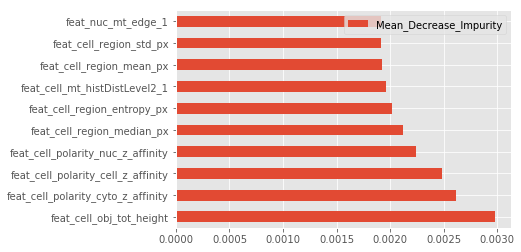

In [12]:
feat_scores = pd.DataFrame({'Mean_Decrease_Impurity' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Mean_Decrease_Impurity', ascending=False)

# Plot the feature importance: mean decrease in impurity
feat_scores[0:10].plot(kind='barh')